In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Car_Purchasing_Data.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df['Country'].value_counts()

Mauritania                  6
Israel                      6
Bolivia                     6
Guinea                      5
Samoa                       5
                           ..
Gabon                       1
Nauru                       1
Central African Republic    1
Sri Lanka                   1
Germany                     1
Name: Country, Length: 211, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [7]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [8]:
X = df.drop(labels=['Customer Name', 'Customer e-mail', 'Car Purchase Amount'], axis=1)

In [9]:
oe = OrdinalEncoder()

In [10]:
countries = oe.fit_transform(X['Country'].values.reshape(-1,1))

In [11]:
X['Country'] = countries

In [12]:
X = X.values

In [13]:
y = df['Car Purchase Amount'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
y_train = scaler.fit_transform(y_train.reshape(-1, 1))

In [19]:
y_test = scaler.transform(y_test.reshape(-1, 1))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
y_train = np.array(y_train)

In [23]:
model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split = 0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 280 samples, validate on 70 samples
Epoch 1/100
280/280 [==============================] - 0s 679us/sample - loss: 0.1101 - val_loss: 0.0497
Epoch 2/100
280/280 [==============================] - 0s 29us/sample - loss: 0.0392 - val_loss: 0.0171
Epoch 3/100
280/280 [==============================] - 0s 26us/sample - loss: 0.0189 - val_loss: 0.0243
Epoch 4/100
280/280 [==============================] - 0s 26us/sample - loss: 0.0218 - val_loss: 0.0206
Epoch 5/100
280/280 [==============================] - 0s 26us/sample - loss: 0.0148 - val_loss: 0.0099
Epoch 6/100
280/280 [==============================] - 0s 26us/sample - loss: 0.0109 - val_loss: 0.0093
Epoch 7/100
280/280 [==============================] - 0s 25us/sample - loss: 0.0098 - val_loss: 0.0064
Epoch 8/100
280/280 [==============================] - 0s 27us/sample - loss: 0.0069 - val_loss: 0.0062
Epoch 9/100
280/280 [====================

280/280 [==============================] - 0s 24us/sample - loss: 5.1697e-05 - val_loss: 7.0058e-05
Epoch 72/100
280/280 [==============================] - 0s 25us/sample - loss: 4.9331e-05 - val_loss: 7.6162e-05
Epoch 73/100
280/280 [==============================] - 0s 24us/sample - loss: 5.0913e-05 - val_loss: 8.6644e-05
Epoch 74/100
280/280 [==============================] - 0s 24us/sample - loss: 4.8911e-05 - val_loss: 6.5452e-05
Epoch 75/100
280/280 [==============================] - 0s 24us/sample - loss: 4.5037e-05 - val_loss: 6.6334e-05
Epoch 76/100
280/280 [==============================] - 0s 24us/sample - loss: 4.6229e-05 - val_loss: 6.1801e-05
Epoch 77/100
280/280 [==============================] - 0s 23us/sample - loss: 4.2037e-05 - val_loss: 6.2734e-05
Epoch 78/100
280/280 [==============================] - 0s 24us/sample - loss: 4.2079e-05 - val_loss: 6.1741e-05
Epoch 79/100
280/280 [==============================] - 0s 23us/sample - loss: 4.1599e-05 - val_loss: 6.8451e

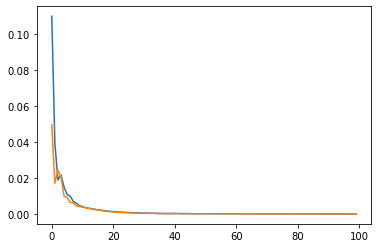

In [24]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [25]:
scaler.inverse_transform(model.predict(X_test))

array([[46675.793],
       [45409.145],
       [63369.98 ],
       [32088.127],
       [60373.47 ],
       [64098.15 ],
       [52038.344],
       [55159.44 ],
       [52723.52 ],
       [48102.703],
       [38868.08 ],
       [55790.11 ],
       [44881.703],
       [39284.297],
       [40481.56 ],
       [54990.047],
       [48863.465],
       [17946.715],
       [61289.766],
       [49568.363],
       [41733.273],
       [52651.805],
       [52373.418],
       [38334.17 ],
       [42429.453],
       [38354.33 ],
       [64574.836],
       [47891.594],
       [23099.543],
       [53055.65 ],
       [55213.883],
       [46043.562],
       [39978.734],
       [57326.613],
       [43639.145],
       [40067.008],
       [61672.164],
       [31373.727],
       [42434.06 ],
       [40040.367],
       [57122.203],
       [60983.863],
       [47081.754],
       [36923.227],
       [54004.848],
       [44879.062],
       [36235.55 ],
       [42619.188],
       [51278.89 ],
       [47229.05 ],


In [26]:
scaler.inverse_transform(y_test)

array([[46082.80993],
       [45058.8969 ],
       [63079.84329],
       [31837.22537],
       [60461.24268],
       [63140.05082],
       [52477.83479],
       [54755.42038],
       [52707.96816],
       [47869.82593],
       [38189.50601],
       [56229.4127 ],
       [44361.87507],
       [39002.0771 ],
       [39975.43302],
       [55174.98946],
       [48901.44342],
       [17584.56963],
       [60526.97788],
       [49991.60697],
       [41352.47071],
       [52785.16947],
       [51730.17434],
       [38042.80065],
       [41357.17897],
       [38243.06228],
       [64147.28888],
       [47984.42062],
       [22681.71667],
       [52240.72866],
       [55167.37361],
       [45857.75365],
       [41147.46679],
       [57430.76903],
       [42925.70921],
       [39888.59789],
       [61731.71426],
       [30841.00154],
       [42209.28948],
       [40093.61981],
       [57303.87131],
       [60670.33672],
       [47443.74443],
       [36638.20688],
       [53489.46214],
       [44